### Import Libraries

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from IPython.display import Image

### Display Image Directly

In [12]:
# Display 18x18 pixel image
Image(filename='checkerboard_18x18.png')

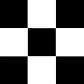

In [13]:
Image(filename='checkerboard_84x84.png')